In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf

def loadDataSet(file):
    dataMat = []
    labelMat = []
    dataLen = len(open(file).readline().split('\t')) - 1
    
    fr = open(file)
    for line in fr.readlines():
        lineArr = []
        currLine = line.strip().split('\t')
        
        # reformat string to float value
        for i in range(dataLen):
            lineArr.append(float(currLine[i]))
        
        # add to data matrix and label matrix
        dataMat.append(lineArr)
        labelMat.append(float(currLine[-1]))
    
    return dataMat, labelMat

# standard regression, formula: y = ws[0] + ws[1] * x
def standRegression(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return

    ws = xTx.I * (xMat.T * yMat)
    return ws

xArr, yArr = loadDataSet('data/ex0.txt')
ws = standRegression(xArr, yArr)
print ws

# calculate the diff between forcast and actual values
yHat = xArr * ws
np.corrcoef(yHat.T, yArr)

[[ 3.00774324]
 [ 1.69532264]]


array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

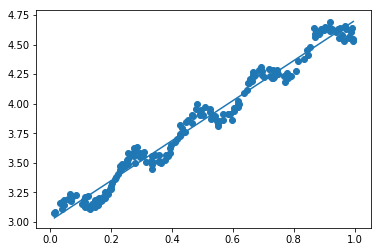

In [3]:
# draw regression line and plot
def regressionPlot():
    xArr, yArr = loadDataSet('data/ex0.txt')
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    ws = standRegression(xArr, yArr)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
    
    # sort in order to draw line
    xCopy = xMat.copy()
    xCopy.sort(0)
    yHat = xCopy * ws
    ax.plot(xCopy[:, 1], yHat)
    
    plt.show()
    
regressionPlot()

In [7]:
# LWLR, locally weighted linear regression
def lwlr(testPoint, xArr, yArr, k = 1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))
    
    # iterate to calculate weights matrix
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        # decrease the weights by exponential rate
        weights[j, j] = np.exp(diffMat * diffMat.T / (-2.0 * k ** 2))
        #print j, diffMat, weights[j, j]
    
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return

    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k = 1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

# use a single point in xArr to calculate weight first, then calculate yHat
yHatPoint = lwlr(xArr[0], xArr, yArr, 0.003)
print yHatPoint

[[ 3.20200665]]


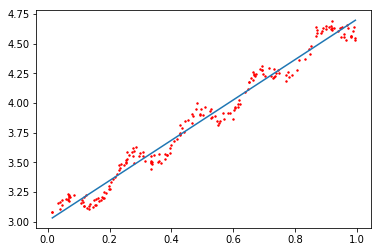

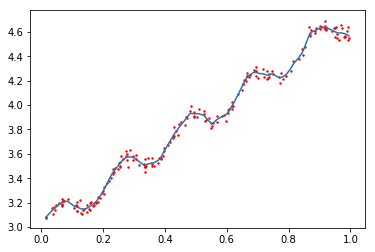

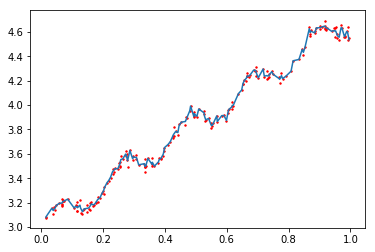

In [8]:
def lwlrPlot(k):
    xArr, yArr = loadDataSet('data/ex0.txt')
    # adjust k value to 1.0, 0.01, 0.003
    yHat = lwlrTest(xArr, xArr, yArr, k)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0], s = 2, c = 'red')
    
    # sort xMat by column index = 1
    sortedIndex = xMat[:, 1].argsort(0)
    xSort = xMat[sortedIndex][:, 0, :]
    ax.plot(xSort[:, 1], yHat[sortedIndex])
    
    plt.show()

lwlrPlot(1.0)
lwlrPlot(0.01)
lwlrPlot(0.003)

In [18]:
# calculate the diff between actual and forecast data
def rssError(yArr, yHatArr):
    return ((yArr - yHatArr) ** 2).sum()

abX, abY = loadDataSet('data/abalone.txt')

# use different k values to train and calculate errors
yHat01 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[0:99], abX[0:99], abY[0:99], 10)
y01Err = rssError(abY[0:99], yHat01.T)
y1Err = rssError(abY[0:99], yHat1.T)
y10Err = rssError(abY[0:99], yHat10.T)
print 'When k=0.1/1/10, training error is', y01Err, y1Err, y10Err

# testing 100-199 data using 0-99 as training data
yHat01 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 0.1)
yHat1 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 1)
yHat10 = lwlrTest(abX[100:199], abX[0:99], abY[0:99], 10)
y01Err = rssError(abY[100:199], yHat01.T)
y1Err = rssError(abY[100:199], yHat1.T)
y10Err = rssError(abY[100:199], yHat10.T)
print 'When k=0.1/1/10, testing error is', y01Err, y1Err, y10Err

# simple standard regression has the similar prediction result
ws = standRegression(abX[0:99], abY[0:99])
yHat = np.mat(abX[100:199]) * ws
rssError(abY[100:199], yHat.T.A)

When k=0.1/1/10, training error is 56.7875734508 429.89056187 549.118170883
When k=0.1/1/10, testing error is 126166.564726 573.52614419 517.571190538


518.63631532439615

[ 0.04304419 -0.02274163  0.13214088  0.02075182  2.22403745 -0.99895298
 -0.11725424  0.16622922]


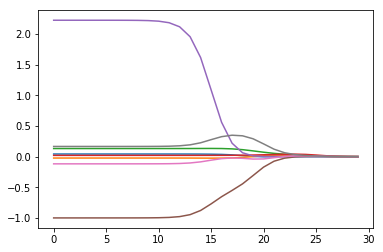

In [20]:
# ridge regression, when n > m (features > sample size)
def ridgeRegression(xMat, yMat, lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx + np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return
    
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    # standardize the xMat values
    xMat = (xMat - xMeans) / xVar

    # testing using 30 different lambda
    numTestPts = 30    
    wMat = np.zeros((numTestPts, np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegression(xMat, yMat, np.exp(i - 10))
        wMat[i, :] = ws.T
    return wMat

def ridgePlot():
    abX, abY = loadDataSet('data/abalone.txt')
    ridgeWeights = ridgeTest(abX, abY)
    print ridgeWeights[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ridgeWeights)
    plt.show()

ridgePlot()

In [22]:
def stageWise(xArr, yArr, eps = 0.01, numIt = 100):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    
    yMean = np.mean(yMat, 0)
    yMat = yMat - yMean
    
    xMeans = np.mean(xMat, 0)
    xVar = np.var(xMat, 0)
    # standardize the xMat values
    xMat = (xMat - xMeans) / xVar
    
    m, n = np.shape(xMat)
    returnMat = np.zeros((numIt, n))
    ws = np.zeros((n, 1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    
    for i in range(numIt):
        print ws.T
        lowestError = inf
        
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :] = ws.T
    
    return returnMat

abX, abY = loadDataSet('data/abalone.txt')
stageWise(abX, abY, 0.01, 200)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.    0.    0.    0.01  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.02  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.03  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.04  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.05  0.    0.    0.    0.  ]]
[[ 0.    0.    0.    0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.  ]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.01]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.02]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.03]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.04]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.05]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.06]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.07]]
[[ 0.    0.    0.01  0.06  0.    0.    0.    0.08]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.08]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.09]]
[[ 0.    0.    0.01  0.05  0.    0.    0.    0.1 ]]
[[ 0.    0.    0.01  0.05  0

[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]


array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])